In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

raw_scores = pd.read_csv("compas-scores-raw.csv")

display(raw_scores)

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60838,65667,79665,72038,Probation,West,James,NaN,Male,African-American,06/21/64,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,3,Medium with Override Consideration,8,Risk of Recidivism,0.16,8,High,New,1,0
60839,65667,79665,72038,Probation,West,James,NaN,Male,African-American,06/21/64,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,3,Medium with Override Consideration,18,Risk of Failure to Appear,35.00,10,High,New,1,0
60840,68603,79669,72042,PRETRIAL,Ryan,Michael,NaN,Male,Caucasian,02/06/85,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,1,Low,7,Risk of Violence,-2.75,2,Low,New,1,0
60841,68603,79669,72042,PRETRIAL,Ryan,Michael,NaN,Male,Caucasian,02/06/85,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,1,Low,8,Risk of Recidivism,-0.34,5,Medium,New,1,0


In [2]:
RFA = raw_scores[raw_scores["DisplayText"] == "Risk of Failure to Appear"].index
ROV = raw_scores[raw_scores["DisplayText"] == "Risk of Violence"].index


In [3]:
raw_scores.drop(RFA, inplace=True)

In [4]:
raw_scores.drop(ROV, inplace=True)

In [5]:
raw_scores['DisplayText'].value_counts()

Risk of Recidivism    20281
Name: DisplayText, dtype: int64

In [6]:
raw_scores["DecileScore"].value_counts()

 1     4560
 2     2779
 3     2249
 4     2031
 5     1767
 6     1700
 7     1520
 8     1351
 9     1304
 10     984
-1       36
Name: DecileScore, dtype: int64

In [9]:
print(raw_scores['ScoreText'].isnull().sum())

36


In [10]:
raw_scores = raw_scores.dropna(subset=['ScoreText'], axis=0, how='any')
display(raw_scores)

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0
7,50855,57181,51963,PRETRIAL,DAYES,DANIEL,NaN,Male,African-American,08/25/94,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,4,High,8,Risk of Recidivism,0.18,8,High,New,1,0
10,50850,57176,51958,PRETRIAL,Debe,Mikerlie,George,Female,African-American,10/09/94,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Significant Other,1/1/13 0:00,2,Medium,8,Risk of Recidivism,-0.53,6,Medium,New,1,0
13,50839,57162,51945,PRETRIAL,McLaurin,Stephanie,Nicole,Female,African-American,06/29/85,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.55,2,Low,New,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60829,68595,79656,72031,PRETRIAL,PENA,ROLANDO,N,Male,Hispanic,06/13/85,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,2,Medium,8,Risk of Recidivism,-0.42,5,Medium,New,1,0
60832,19968,39866,36500,PRETRIAL,BUTTERFIELD,JAMES,MICHAEL,Male,Caucasian,09/24/73,22,Risk and Prescreen,Intake,English,Post Sentence,Probation,Single,12/31/14 0:00,1,Low,8,Risk of Recidivism,-0.36,5,Medium,New,1,0
60835,68598,79660,72035,PRETRIAL,SUAREZ,ANDERSON,NaN,Male,Caucasian,08/10/81,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,1,Low,8,Risk of Recidivism,-1.57,1,Low,New,1,0
60838,65667,79665,72038,Probation,West,James,NaN,Male,African-American,06/21/64,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,3,Medium with Override Consideration,8,Risk of Recidivism,0.16,8,High,New,1,0


In [11]:
print(raw_scores['ScoreText'].isnull().sum())

0


In [12]:
display(raw_scores)

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0
7,50855,57181,51963,PRETRIAL,DAYES,DANIEL,NaN,Male,African-American,08/25/94,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,4,High,8,Risk of Recidivism,0.18,8,High,New,1,0
10,50850,57176,51958,PRETRIAL,Debe,Mikerlie,George,Female,African-American,10/09/94,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Significant Other,1/1/13 0:00,2,Medium,8,Risk of Recidivism,-0.53,6,Medium,New,1,0
13,50839,57162,51945,PRETRIAL,McLaurin,Stephanie,Nicole,Female,African-American,06/29/85,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.55,2,Low,New,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60829,68595,79656,72031,PRETRIAL,PENA,ROLANDO,N,Male,Hispanic,06/13/85,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,2,Medium,8,Risk of Recidivism,-0.42,5,Medium,New,1,0
60832,19968,39866,36500,PRETRIAL,BUTTERFIELD,JAMES,MICHAEL,Male,Caucasian,09/24/73,22,Risk and Prescreen,Intake,English,Post Sentence,Probation,Single,12/31/14 0:00,1,Low,8,Risk of Recidivism,-0.36,5,Medium,New,1,0
60835,68598,79660,72035,PRETRIAL,SUAREZ,ANDERSON,NaN,Male,Caucasian,08/10/81,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,1,Low,8,Risk of Recidivism,-1.57,1,Low,New,1,0
60838,65667,79665,72038,Probation,West,James,NaN,Male,African-American,06/21/64,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,3,Medium with Override Consideration,8,Risk of Recidivism,0.16,8,High,New,1,0


In [13]:
raw_scores["ScoreText"].value_counts()

Low       11619
Medium     4987
High       3639
Name: ScoreText, dtype: int64

In [14]:
raw_scores["Ethnic_Code_Text"].value_counts()

African-American    8993
Caucasian           7247
Hispanic            2907
Other                862
Asian                108
Native American       73
Arabic                25
African-Am            17
Oriental              13
Name: Ethnic_Code_Text, dtype: int64

Only left with recidivism scores & Removed decile score -1

In [15]:
#check every variable for missing values
print(raw_scores['IsDeleted'].isnull().sum())
print(raw_scores['IsDeleted'].isnull().values.any())


0
False


In [16]:
"""compas_target = raw_scores['DecileScore'].to_numpy()
display(compas_target)"""

compas_target = raw_scores['ScoreText'] #.to_numpy()
display(compas_target)

1           Low
4           Low
7          High
10       Medium
13          Low
          ...  
60829    Medium
60832    Medium
60835       Low
60838      High
60841    Medium
Name: ScoreText, Length: 20245, dtype: object

### Removing 15 columns

In [17]:
x_compas = raw_scores.drop(columns=["DateOfBirth", "Scale_ID", "Screening_Date", "ScaleSet_ID", "RecSupervisionLevel", "DecileScore", "ScoreText", "LastName", "FirstName", "MiddleName", "DisplayText", "IsCompleted", "IsDeleted", "AssessmentID", "Case_ID", "RawScore"])
#removed variables: DecileScore (since it's our target), and ScoreText (since it belongs to the DecileScore)

display(x_compas)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType
1,50844,PRETRIAL,Male,Caucasian,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,Low,New
4,50848,PRETRIAL,Male,Caucasian,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,Low,New
7,50855,PRETRIAL,Male,African-American,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,High,New
10,50850,PRETRIAL,Female,African-American,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Significant Other,Medium,New
13,50839,PRETRIAL,Female,African-American,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,Low,New
...,...,...,...,...,...,...,...,...,...,...,...,...
60829,68595,PRETRIAL,Male,Hispanic,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,Medium,New
60832,19968,PRETRIAL,Male,Caucasian,Risk and Prescreen,Intake,English,Post Sentence,Probation,Single,Low,New
60835,68598,PRETRIAL,Male,Caucasian,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,Low,New
60838,65667,Probation,Male,African-American,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,Medium with Override Consideration,New


In [18]:
x_compas.dtypes

Person_ID                   int64
Agency_Text                object
Sex_Code_Text              object
Ethnic_Code_Text           object
ScaleSet                   object
AssessmentReason           object
Language                   object
LegalStatus                object
CustodyStatus              object
MaritalStatus              object
RecSupervisionLevelText    object
AssessmentType             object
dtype: object

In [19]:
raw_scores['Ethnic_Code_Text'].value_counts()

African-American    8993
Caucasian           7247
Hispanic            2907
Other                862
Asian                108
Native American       73
Arabic                25
African-Am            17
Oriental              13
Name: Ethnic_Code_Text, dtype: int64

Change all the objects

In [20]:
cleanup_nums = {"Agency_Text": {"PRETRIAL":1, "Probation":2, "DRRD":3, "Broward County":4},
                "Sex_Code_Text": {"Male":1, "Female":2},
                "Ethnic_Code_Text": {"African-American":1, "African-Am":1, "Caucasian":2, "Hispanic":3, "Asian":4, "Native American":5, "Arabic":6, "Oriental":7, "Other":8},
                "ScaleSet": {"Risk and Prescreen":1, "All Scales":2},
                "AssessmentReason": {"Intake":1},
                "Language": {"English":1, "Spanish":2},
                "LegalStatus": {"Pretrial":1, "Post Sentence":2, "Conditional Release":3, "Probation Violator":4, "Parole Violator":5, "Deferred Sentencing":6, "Other":7},
                "CustodyStatus": {"Jail Inmate":1, "Probation":2, "Pretrial Defendant":3, "Residential Program":4, "Parole":5, "Prison Inmate":6},
                "MaritalStatus": {"Single":1, "Married":2, "Divorced":3, "Separated":4, "Significant Other":5, "Widowed":6, "Unknown":7},
                "RecSupervisionLevelText": {"Low":1, "Medium":2, "Medium with Override Consideration":3, "High":4},
                "AssessmentType": {"New":1, "Copy":2}}


Although Python language is focussed at 0 as a starting point, when training the Neural Network I got stuck in a local / global minima, hence one of the theories to change was to set the startpoint of categorical variables to 1 instead of 0. Although this didn't help with the problem, i stuck with this theory to not get further complications. 

In [21]:
x_compas = x_compas.replace(cleanup_nums)
display(x_compas)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType
1,50844,1,1,2,1,1,1,1,1,1,1,1
4,50848,1,1,2,1,1,1,1,1,2,1,1
7,50855,1,1,1,1,1,1,1,1,1,4,1
10,50850,1,2,1,1,1,1,1,1,5,2,1
13,50839,1,2,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
60829,68595,1,1,3,1,1,1,1,1,1,2,1
60832,19968,1,1,2,1,1,1,2,2,1,1,1
60835,68598,1,1,2,1,1,1,1,1,1,1,1
60838,65667,2,1,1,1,1,1,1,1,1,3,1


In [22]:
pd.crosstab(raw_scores.ScoreText, x_compas.Ethnic_Code_Text)

Ethnic_Code_Text,1,2,3,4,5,6,7,8
ScoreText,,,,,,,,
High,2534,786,241,6,19,3,1,49
Low,3766,4902,2125,88,33,16,10,679
Medium,2710,1559,541,14,21,6,2,134


In [23]:
x_compas.dtypes

Person_ID                  int64
Agency_Text                int64
Sex_Code_Text              int64
Ethnic_Code_Text           int64
ScaleSet                   int64
AssessmentReason           int64
Language                   int64
LegalStatus                int64
CustodyStatus              int64
MaritalStatus              int64
RecSupervisionLevelText    int64
AssessmentType             int64
dtype: object

# Transforming

In [27]:
#train test split - import 
from sklearn.model_selection import train_test_split as tts

x, x_test, y, y_test = tts(x_compas, compas_target, test_size=0.20, train_size=0.80, random_state=33) 
x_train, x_val, y_train, y_val = tts(x, y, test_size=0.25, train_size=0.75, random_state=33)

In [28]:
print("Train size:", x_train.shape)
print("Test size:", x_test.shape)
print("Validation size:", x_val.shape)

Train size: (12147, 12)
Test size: (4049, 12)
Validation size: (4049, 12)


In [29]:
print(y_test)

6100        Low
21550       Low
50374       Low
30328       Low
60670       Low
          ...  
13537       Low
23464      High
17437       Low
51229    Medium
58132       Low
Name: ScoreText, Length: 4049, dtype: object


In [30]:
from sklearn.preprocessing import LabelBinarizer, StandardScaler, LabelEncoder

#Without the StandardScaler on the dataset, the model is stuck in a local / global minima. 
#Standardizing didn't only solve the model being stuck, the performance also increased significantly after applying this.
SS = StandardScaler()
X_train = SS.fit_transform(x_train)
X_test  = SS.fit_transform(x_test)
X_val   = SS.fit_transform(x_val)

LB = LabelBinarizer()

Y_train = LB.fit_transform(y_train)
Y_val   = LB.fit_transform(y_val)
Y_test  = LB.fit_transform(y_test)

In [33]:
print(Y_test)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [0 1 0]
 [0 0 1]
 [0 1 0]]


In [34]:
print(y_test)

6100        Low
21550       Low
50374       Low
30328       Low
60670       Low
          ...  
13537       Low
23464      High
17437       Low
51229    Medium
58132       Low
Name: ScoreText, Length: 4049, dtype: object


In [35]:
print(Y_train.shape)

(12147, 3)


In [36]:
pd.crosstab(y_val, x_val.Ethnic_Code_Text)

Ethnic_Code_Text,1,2,3,4,5,6,8
ScoreText,,,,,,,
High,512,165,42,2,5,1,10
Low,745,969,433,23,9,2,130
Medium,541,321,100,4,3,0,32


# The model

In [37]:
#Now without RawScore
#BEST PERFORMING & NO USE OF SIGMOID!!
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LeakyReLU
from keras.optimizers import Adam, SGD
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

baseline = Sequential()
#INPUT LAYER
baseline.add(Dense(256, input_dim=X_train.shape[1], activation='tanh'))
#model2.add(Dropout(0.1))

#HIDDEN LAYERS
baseline.add(Dense(128))
baseline.add(LeakyReLU(alpha=0.05))
#model2.add(Dropout(0.1))

baseline.add(Dense(64))
baseline.add(LeakyReLU(alpha=0.05))
#model2.add(Dropout(0.1))

baseline.add(Dense(64))
baseline.add(LeakyReLU(alpha=0.05))
#model2.add(Dropout(0.1))

baseline.add(Dense(32))
baseline.add(LeakyReLU(alpha=0.05))
#model2.add(Dropout(0.1))

#OUTPUT LAYER
baseline.add(Dense(3, activation='softmax')) #last layer is always the amount of outputs you have

#run the model
optimizer = Adam(lr=0.0001) #SGD(lr=0.001, nesterov=True)
baseline.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics="accuracy")
history = baseline.fit(X_train, Y_train, epochs=30, batch_size=128, verbose=1, validation_data=(X_test,Y_test), 
           callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

#loss: 0.0182 - accuracy: 0.9941 - val_loss: 0.0224 - val_accuracy: 0.9914

Epoch 1/30
95/95 [==============================] - 1s 12ms/step - loss: 0.9189 - accuracy: 0.6886 - val_loss: 0.6883 - val_accuracy: 0.7678
Epoch 2/30
95/95 [==============================] - 0s 5ms/step - loss: 0.5286 - accuracy: 0.8043 - val_loss: 0.4219 - val_accuracy: 0.8661
Epoch 3/30
95/95 [==============================] - 1s 6ms/step - loss: 0.3706 - accuracy: 0.8892 - val_loss: 0.3466 - val_accuracy: 0.8916
Epoch 4/30
95/95 [==============================] - 1s 5ms/step - loss: 0.3272 - accuracy: 0.8953 - val_loss: 0.3286 - val_accuracy: 0.8928
Epoch 5/30
95/95 [==============================] - 0s 5ms/step - loss: 0.3157 - accuracy: 0.8959 - val_loss: 0.3234 - val_accuracy: 0.8921
Epoch 6/30
95/95 [==============================] - 0s 5ms/step - loss: 0.3118 - accuracy: 0.8955 - val_loss: 0.3224 - val_accuracy: 0.8931
Epoch 7/30
95/95 [==============================] - 1s 6ms/step - loss: 0.3091 - accuracy: 0.8963 - val_loss: 0.3215 - val_accuracy: 0.8923
Epoch 8/30
95/95 [=

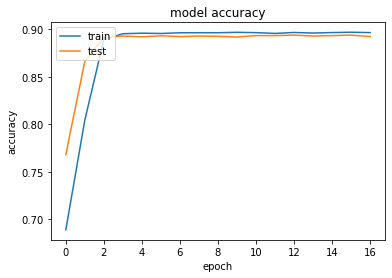

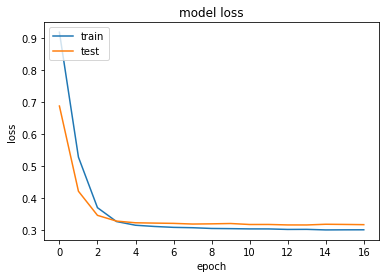

In [38]:
import matplotlib.pyplot as plt 

#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Balanced Residuals Baseline on val

In [39]:
#Balanced Residuals
import numpy as np

y_pred_val   = np.argmax(baseline.predict(X_val), axis=-1)
y_hats_val   = pd.DataFrame(data = y_pred_val, columns=['y_pred_val'], index=x_val.index.copy())


In [40]:
regular_out = pd.merge(x_compas, y_hats_val, how='left', left_index=True, right_index=True )

regular_out["y_val"] = y_val

display(regular_out)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_pred_val,y_val
1,50844,1,1,2,1,1,1,1,1,1,1,1,NaN,NaN
4,50848,1,1,2,1,1,1,1,1,2,1,1,1.0,Low
7,50855,1,1,1,1,1,1,1,1,1,4,1,NaN,NaN
10,50850,1,2,1,1,1,1,1,1,5,2,1,NaN,NaN
13,50839,1,2,1,1,1,1,1,1,1,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60829,68595,1,1,3,1,1,1,1,1,1,2,1,NaN,NaN
60832,19968,1,1,2,1,1,1,2,2,1,1,1,NaN,NaN
60835,68598,1,1,2,1,1,1,1,1,1,1,1,NaN,NaN
60838,65667,2,1,1,1,1,1,1,1,1,3,1,NaN,NaN


In [41]:
display(y_val)

30454    Medium
15880       Low
59293       Low
59491    Medium
8851     Medium
          ...  
11242    Medium
51382      High
56452       Low
12151       Low
36442    Medium
Name: ScoreText, Length: 4049, dtype: object

In [42]:
print(Y_val) #medium = 2, low = 1, high = 0

[[0 0 1]
 [0 1 0]
 [0 1 0]
 ...
 [0 1 0]
 [0 1 0]
 [0 0 1]]


In [43]:
print(y_pred_val)

[1 1 1 ... 1 1 0]


In [44]:
# low = 1, med = 2, and high = 0. See above, so now altered to 0 = low, med = 1, and high = 2

cleanup_nums1 = {"y_val": {"Low":0, "Medium":1, "High":2}, 
                 "y_pred_val": {1.0:0, 2.0:1, 0.0:2}}

regular_out = regular_out.replace(cleanup_nums1)
display(regular_out)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_pred_val,y_val
1,50844,1,1,2,1,1,1,1,1,1,1,1,NaN,NaN
4,50848,1,1,2,1,1,1,1,1,2,1,1,0.0,0.0
7,50855,1,1,1,1,1,1,1,1,1,4,1,NaN,NaN
10,50850,1,2,1,1,1,1,1,1,5,2,1,NaN,NaN
13,50839,1,2,1,1,1,1,1,1,1,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60829,68595,1,1,3,1,1,1,1,1,1,2,1,NaN,NaN
60832,19968,1,1,2,1,1,1,2,2,1,1,1,NaN,NaN
60835,68598,1,1,2,1,1,1,1,1,1,1,1,NaN,NaN
60838,65667,2,1,1,1,1,1,1,1,1,3,1,NaN,NaN


In [45]:
regular_AA = regular_out[regular_out["Ethnic_Code_Text"] == 1]
display(regular_AA)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_pred_val,y_val
7,50855,1,1,1,1,1,1,1,1,1,4,1,NaN,NaN
10,50850,1,2,1,1,1,1,1,1,5,2,1,NaN,NaN
13,50839,1,2,1,1,1,1,1,1,1,1,1,NaN,NaN
22,50853,1,1,1,1,1,1,1,1,1,3,1,NaN,NaN
31,50843,1,1,1,1,1,1,1,1,1,3,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60805,62296,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0
60808,45932,1,1,1,1,1,1,1,3,1,3,2,NaN,NaN
60811,24873,1,1,1,1,1,1,1,1,1,4,2,NaN,NaN
60817,44498,1,1,1,2,1,1,2,2,1,3,2,NaN,NaN


In [46]:
regular_other_2 = regular_out[regular_out["Ethnic_Code_Text"] == 2]
regular_other_3 = regular_out[regular_out["Ethnic_Code_Text"] == 3]
regular_other_4 = regular_out[regular_out["Ethnic_Code_Text"] == 4]
regular_other_5 = regular_out[regular_out["Ethnic_Code_Text"] == 5]
regular_other_6 = regular_out[regular_out["Ethnic_Code_Text"] == 6]
regular_other_7 = regular_out[regular_out["Ethnic_Code_Text"] == 7]
regular_other_8 = regular_out[regular_out["Ethnic_Code_Text"] == 8]
regular_other_9 = regular_out[regular_out["Ethnic_Code_Text"] == 9]

regular_other = pd.concat([regular_other_2, regular_other_3, regular_other_4, regular_other_5, regular_other_6, regular_other_7, regular_other_8, regular_other_9])
display(regular_other)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_pred_val,y_val
1,50844,1,1,2,1,1,1,1,1,1,1,1,NaN,NaN
4,50848,1,1,2,1,1,1,1,1,2,1,1,0.0,0.0
19,50840,1,2,2,1,1,1,1,1,1,1,1,0.0,0.0
28,50842,1,1,2,1,1,1,1,1,1,1,1,0.0,0.0
34,50854,1,1,2,1,1,1,1,1,1,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60517,68508,1,1,8,1,1,1,1,1,2,1,1,NaN,NaN
60529,68516,1,2,8,1,1,1,1,1,1,1,1,NaN,NaN
60706,68554,1,1,8,1,1,1,1,1,5,1,1,NaN,NaN
60754,68593,1,1,8,1,1,1,1,3,1,1,1,NaN,NaN


In [47]:
regular_other_ypredval = regular_other["y_pred_val"]
regular_other_ytrueval = regular_other["y_val"]

In [48]:
regular_AA_ypredval = regular_AA["y_pred_val"]
regular_AA_ytrueval = regular_AA["y_val"]

In [49]:
regular_other_ypredval = regular_other_ypredval.dropna()
regular_other_ytrueval = regular_other_ytrueval.dropna()

regular_AA_ypredval = regular_AA_ypredval.dropna()
regular_AA_ytrueval = regular_AA_ytrueval.dropna()

display(regular_other_ypredval)
display(regular_other_ytrueval)
display(regular_AA_ypredval)
display(regular_AA_ytrueval)

4        0.0
19       0.0
28       0.0
79       1.0
85       2.0
        ... 
59245    0.0
59311    0.0
59740    0.0
60013    0.0
60331    2.0
Name: y_pred_val, Length: 2251, dtype: float64

4        0.0
19       0.0
28       0.0
79       1.0
85       2.0
        ... 
59245    0.0
59311    0.0
59740    0.0
60013    0.0
60331    2.0
Name: y_val, Length: 2251, dtype: float64

40       0.0
43       1.0
58       0.0
76       2.0
82       2.0
        ... 
60649    1.0
60658    0.0
60709    2.0
60727    1.0
60805    0.0
Name: y_pred_val, Length: 1798, dtype: float64

40       0.0
43       1.0
58       0.0
76       2.0
82       2.0
        ... 
60649    1.0
60658    0.0
60709    2.0
60727    1.0
60805    0.0
Name: y_val, Length: 1798, dtype: float64

- AA = 1798 size
- Other = 2251 size

Total = 4049

In [50]:
val_dif_ro = (regular_other_ytrueval - regular_other_ypredval).sum()
print(val_dif_ro)

residuals_ro = val_dif_ro / 2251 
print(residuals_ro)

130.0
0.05775211017325633


In [51]:
val_dif_rAA = (regular_AA_ytrueval - regular_AA_ypredval).sum()
print(val_dif_rAA)

residuals_rAA = val_dif_rAA / 1798
print(residuals_rAA)

75.0
0.04171301446051168


In [52]:
discrimination_balanced_residuals_regular = residuals_rAA - residuals_ro

print(discrimination_balanced_residuals_regular)

-0.01603909571274465


# Model without protected attributes

In [54]:
display(x_compas)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType
1,50844,1,1,2,1,1,1,1,1,1,1,1
4,50848,1,1,2,1,1,1,1,1,2,1,1
7,50855,1,1,1,1,1,1,1,1,1,4,1
10,50850,1,2,1,1,1,1,1,1,5,2,1
13,50839,1,2,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
60829,68595,1,1,3,1,1,1,1,1,1,2,1
60832,19968,1,1,2,1,1,1,2,2,1,1,1
60835,68598,1,1,2,1,1,1,1,1,1,1,1
60838,65667,2,1,1,1,1,1,1,1,1,3,1


In [55]:
pro_ethnic = x_compas["Ethnic_Code_Text"]
print(pro_ethnic)

1        2
4        2
7        1
10       1
13       1
        ..
60829    3
60832    2
60835    2
60838    1
60841    2
Name: Ethnic_Code_Text, Length: 20245, dtype: int64


In [56]:
protected_compas = x_compas.drop(columns=["Sex_Code_Text", "Ethnic_Code_Text", "MaritalStatus"])

display(protected_compas)

,Person_ID,Agency_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,RecSupervisionLevelText,AssessmentType
1,50844,1,1,1,1,1,1,1,1
4,50848,1,1,1,1,1,1,1,1
7,50855,1,1,1,1,1,1,4,1
10,50850,1,1,1,1,1,1,2,1
13,50839,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
60829,68595,1,1,1,1,1,1,2,1
60832,19968,1,1,1,1,2,2,1,1
60835,68598,1,1,1,1,1,1,1,1
60838,65667,2,1,1,1,1,1,3,1


In [57]:
"""protected_compas = protected_compas.to_numpy()
print(protected_compas)"""

'protected_compas = protected_compas.to_numpy()\nprint(protected_compas)'

In [58]:
#train test split - import 
from sklearn.model_selection import train_test_split as tts

x_pro, x_test_pro, y_pro, y_test_pro = tts(protected_compas, compas_target, test_size=0.20, train_size=0.80, random_state=33) 
x_train_pro, x_val_pro, y_train_pro, y_val_pro = tts(x_pro, y_pro, test_size=0.25, train_size=0.75, random_state=33)

In [59]:
print("Train size:", x_train_pro.shape)
print("Test size:", x_test_pro.shape)
print("Validation size:", x_val_pro.shape)

Train size: (12147, 9)
Test size: (4049, 9)
Validation size: (4049, 9)


In [60]:
from sklearn.preprocessing import LabelBinarizer, StandardScaler

#Without the StandardScaler on the dataset, the model is stuck in a local / global minima. 
#Standardizing didn't only solve the model being stuck, the performance also increased significantly after applying this.
SS = StandardScaler()
X_train_pro = SS.fit_transform(x_train_pro)
X_test_pro  = SS.fit_transform(x_test_pro)
X_val_pro   = SS.fit_transform(x_val_pro)

LB = LabelBinarizer()

Y_train_pro = LB.fit_transform(y_train_pro)
Y_val_pro   = LB.fit_transform(y_val_pro)
Y_test_pro  = LB.fit_transform(y_test_pro)


In [61]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LeakyReLU
from keras.optimizers import Adam, SGD
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

pro_baseline = Sequential()
#INPUT LAYER
pro_baseline.add(Dense(256, input_dim=X_train_pro.shape[1], activation='tanh'))

#HIDDEN LAYERS
pro_baseline.add(Dense(128))
pro_baseline.add(LeakyReLU(alpha=0.05))

pro_baseline.add(Dense(64))
pro_baseline.add(LeakyReLU(alpha=0.05))

pro_baseline.add(Dense(64))
pro_baseline.add(LeakyReLU(alpha=0.05))

pro_baseline.add(Dense(32))
pro_baseline.add(LeakyReLU(alpha=0.05))

#OUTPUT LAYER
pro_baseline.add(Dense(3, activation='softmax'))

#run the model
optimizer = Adam(lr=0.0001) 
pro_baseline.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics="accuracy")
history_protected = pro_baseline.fit(X_train_pro, Y_train_pro, epochs=30, batch_size=128, verbose=1, 
                    validation_data=(X_test_pro,Y_test_pro), callbacks=[EarlyStopping(monitor='val_loss', patience=3)])



Epoch 1/30
95/95 [==============================] - 1s 10ms/step - loss: 0.9330 - accuracy: 0.6914 - val_loss: 0.6739 - val_accuracy: 0.8256
Epoch 2/30
95/95 [==============================] - 0s 4ms/step - loss: 0.4910 - accuracy: 0.8595 - val_loss: 0.3946 - val_accuracy: 0.8928
Epoch 3/30
95/95 [==============================] - 0s 4ms/step - loss: 0.3617 - accuracy: 0.8955 - val_loss: 0.3485 - val_accuracy: 0.8918
Epoch 4/30
95/95 [==============================] - 1s 6ms/step - loss: 0.3354 - accuracy: 0.8956 - val_loss: 0.3383 - val_accuracy: 0.8931
Epoch 5/30
95/95 [==============================] - 0s 5ms/step - loss: 0.3290 - accuracy: 0.8958 - val_loss: 0.3350 - val_accuracy: 0.8931
Epoch 6/30
95/95 [==============================] - 1s 6ms/step - loss: 0.3252 - accuracy: 0.8960 - val_loss: 0.3333 - val_accuracy: 0.8928
Epoch 7/30
95/95 [==============================] - 1s 5ms/step - loss: 0.3234 - accuracy: 0.8961 - val_loss: 0.3310 - val_accuracy: 0.8926
Epoch 8/30
95/95 [=

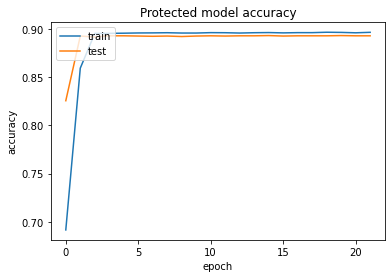

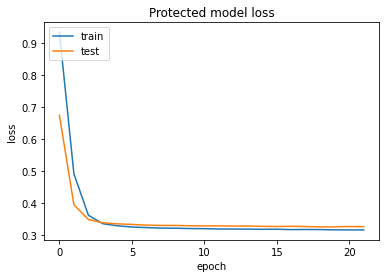

In [62]:
#accuracy
plt.plot(history_protected.history['accuracy'])
plt.plot(history_protected.history['val_accuracy'])
plt.title('Protected model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#loss 
plt.plot(history_protected.history['loss'])
plt.plot(history_protected.history['val_loss'])
plt.title('Protected model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Balanced Residuals without Protected Attributes model

In [63]:
# model = pro_baseline
#X_val_pro & Y_val_pro / x_val_pro & y_val_pro

In [64]:
y_pred_val_pro   = np.argmax(pro_baseline.predict(X_val_pro), axis=-1)
y_hats_val_pro   = pd.DataFrame(data = y_pred_val_pro, columns=['y_pred_val_pro'], index=x_val_pro.index.copy())

In [65]:
regular_out = pd.merge(x_compas, y_hats_val_pro, how='left', left_index=True, right_index=True )

regular_out["y_val_pro"] = y_val_pro

display(regular_out)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_pred_val_pro,y_val_pro
1,50844,1,1,2,1,1,1,1,1,1,1,1,NaN,NaN
4,50848,1,1,2,1,1,1,1,1,2,1,1,1.0,Low
7,50855,1,1,1,1,1,1,1,1,1,4,1,NaN,NaN
10,50850,1,2,1,1,1,1,1,1,5,2,1,NaN,NaN
13,50839,1,2,1,1,1,1,1,1,1,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60829,68595,1,1,3,1,1,1,1,1,1,2,1,NaN,NaN
60832,19968,1,1,2,1,1,1,2,2,1,1,1,NaN,NaN
60835,68598,1,1,2,1,1,1,1,1,1,1,1,NaN,NaN
60838,65667,2,1,1,1,1,1,1,1,1,3,1,NaN,NaN


In [66]:
cleanup_nums2 = {"y_val_pro": {"Low":0, "Medium":1, "High":2}, 
                 "y_pred_val_pro": {1.0:0, 2.0:1, 0.0:2}}

regular_out_pro = regular_out.replace(cleanup_nums2)
display(regular_out_pro)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_pred_val_pro,y_val_pro
1,50844,1,1,2,1,1,1,1,1,1,1,1,NaN,NaN
4,50848,1,1,2,1,1,1,1,1,2,1,1,0.0,0.0
7,50855,1,1,1,1,1,1,1,1,1,4,1,NaN,NaN
10,50850,1,2,1,1,1,1,1,1,5,2,1,NaN,NaN
13,50839,1,2,1,1,1,1,1,1,1,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60829,68595,1,1,3,1,1,1,1,1,1,2,1,NaN,NaN
60832,19968,1,1,2,1,1,1,2,2,1,1,1,NaN,NaN
60835,68598,1,1,2,1,1,1,1,1,1,1,1,NaN,NaN
60838,65667,2,1,1,1,1,1,1,1,1,3,1,NaN,NaN


In [67]:
regular_AA_pro = regular_out_pro[regular_out_pro["Ethnic_Code_Text"] == 1]
display(regular_AA_pro)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_pred_val_pro,y_val_pro
7,50855,1,1,1,1,1,1,1,1,1,4,1,NaN,NaN
10,50850,1,2,1,1,1,1,1,1,5,2,1,NaN,NaN
13,50839,1,2,1,1,1,1,1,1,1,1,1,NaN,NaN
22,50853,1,1,1,1,1,1,1,1,1,3,1,NaN,NaN
31,50843,1,1,1,1,1,1,1,1,1,3,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60805,62296,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0
60808,45932,1,1,1,1,1,1,1,3,1,3,2,NaN,NaN
60811,24873,1,1,1,1,1,1,1,1,1,4,2,NaN,NaN
60817,44498,1,1,1,2,1,1,2,2,1,3,2,NaN,NaN


In [68]:
regular_other_2 = regular_out_pro[regular_out_pro["Ethnic_Code_Text"] == 2]
regular_other_3 = regular_out_pro[regular_out_pro["Ethnic_Code_Text"] == 3]
regular_other_4 = regular_out_pro[regular_out_pro["Ethnic_Code_Text"] == 4]
regular_other_5 = regular_out_pro[regular_out_pro["Ethnic_Code_Text"] == 5]
regular_other_6 = regular_out_pro[regular_out_pro["Ethnic_Code_Text"] == 6]
regular_other_7 = regular_out_pro[regular_out_pro["Ethnic_Code_Text"] == 7]
regular_other_8 = regular_out_pro[regular_out_pro["Ethnic_Code_Text"] == 8]
regular_other_9 = regular_out_pro[regular_out_pro["Ethnic_Code_Text"] == 9]

regular_other_pro = pd.concat([regular_other_2, regular_other_3, regular_other_4, regular_other_5, regular_other_6, regular_other_7, regular_other_8, regular_other_9])
display(regular_other_pro)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_pred_val_pro,y_val_pro
1,50844,1,1,2,1,1,1,1,1,1,1,1,NaN,NaN
4,50848,1,1,2,1,1,1,1,1,2,1,1,0.0,0.0
19,50840,1,2,2,1,1,1,1,1,1,1,1,0.0,0.0
28,50842,1,1,2,1,1,1,1,1,1,1,1,0.0,0.0
34,50854,1,1,2,1,1,1,1,1,1,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60517,68508,1,1,8,1,1,1,1,1,2,1,1,NaN,NaN
60529,68516,1,2,8,1,1,1,1,1,1,1,1,NaN,NaN
60706,68554,1,1,8,1,1,1,1,1,5,1,1,NaN,NaN
60754,68593,1,1,8,1,1,1,1,3,1,1,1,NaN,NaN


In [69]:
regular_other_ypredval = regular_other_pro["y_pred_val_pro"]
regular_other_ytrueval = regular_other_pro["y_val_pro"]

regular_AA_ypredval = regular_AA_pro["y_pred_val_pro"]
regular_AA_ytrueval = regular_AA_pro["y_val_pro"]

regular_other_ypredval = regular_other_ypredval.dropna()
regular_other_ytrueval = regular_other_ytrueval.dropna()

regular_AA_ypredval = regular_AA_ypredval.dropna()
regular_AA_ytrueval = regular_AA_ytrueval.dropna()

display(regular_other_ypredval)
display(regular_other_ytrueval)
display(regular_AA_ypredval)
display(regular_AA_ytrueval)

4        0.0
19       0.0
28       0.0
79       1.0
85       2.0
        ... 
59245    0.0
59311    0.0
59740    0.0
60013    0.0
60331    2.0
Name: y_pred_val_pro, Length: 2251, dtype: float64

4        0.0
19       0.0
28       0.0
79       1.0
85       2.0
        ... 
59245    0.0
59311    0.0
59740    0.0
60013    0.0
60331    2.0
Name: y_val_pro, Length: 2251, dtype: float64

40       0.0
43       1.0
58       0.0
76       2.0
82       2.0
        ... 
60649    1.0
60658    0.0
60709    2.0
60727    1.0
60805    0.0
Name: y_pred_val_pro, Length: 1798, dtype: float64

40       0.0
43       1.0
58       0.0
76       2.0
82       2.0
        ... 
60649    1.0
60658    0.0
60709    2.0
60727    1.0
60805    0.0
Name: y_val_pro, Length: 1798, dtype: float64

In [70]:
# TRUE - PRED
val_dif_ro = (regular_other_ytrueval - regular_other_ypredval).sum()
print(val_dif_ro)

residuals_ro = val_dif_ro / 2251
print(residuals_ro)

130.0
0.05775211017325633


In [71]:
# TRUE - PRED
val_dif_rAA = (regular_AA_ytrueval - regular_AA_ypredval).sum()
print(val_dif_rAA)


residuals_rAA = val_dif_rAA / 1798
print(residuals_rAA)

67.0
0.03726362625139043


In [72]:
discrimination_balanced_residuals_regular = residuals_rAA - residuals_ro

print(discrimination_balanced_residuals_regular)

-0.020488483921865898
